# Regression analysis within variables

Includes: virulence annotation, merops, cazymes, BGCs, metadata, genome statistics

Author: Sandra Godinho Silva \
Creation date: 24/11/2020 \
Version: 0.2 (04/02/2020)

In [33]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt  # To visualize
from sklearn.linear_model import LinearRegression

In [34]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 1000)

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

## Merops annotation

In [36]:
merops_orfs = pd.read_csv("../../3_Annotation/Merops/merops_counts.csv")
merops_orfs = merops_orfs.rename(columns={"Unnamed: 0":"ID"}).set_index("ID").T
merops_orfs["Merops orfs total"] = merops_orfs.sum(axis=1)
merops_orfs2 = merops_orfs.copy()
merops_orfs = merops_orfs.reset_index()
merops = merops_orfs[["index", "Merops orfs total"]]
merops_orfs.head()

0           0           0           0   
3            0           0           0           0           0           0   
4            0           0           0           0           0           0   

ID  MER0014300  MER0014064  MER0001503  MER0000587  MER0036078  MER0105341  \
0            0           0           0           0           0           0   
1            0           0           0           0           0           0   
2            0           0           0           0           0           0   
3            0           0           0           0           0           0   
4            0           0           0           0           0           0   

ID  MER0003369  MER0005093  MER0011237  MER0002577  MER0005923  MER0199690  \
0            0           0           0           0           0           0   
1            0           0           0           0           0           0   
2            0           0           0           0           0           0   
3            0           0           0           0           0           0   
4            0           0           0           0           0           0   

ID  MER0011830  MER0001138  MER0022664  MER0036069  MER0022823  MER0033175  \
0            0           0           0           0           0           0   
1            0           0           0           0           0           0   
2            0           0           0           0           0           0   
3            0           0           0           0           0           0   
4            0           0           0           0           0           0   

ID  MER0033227  MER0011811  MER0002267  MER0036617  MER0033481  MER0024892  \
0            0           0           0           0           0           0   
1            0           0           0           0           0           0   
2            0           0           0           0           0           0   
3            0           0           0           0           0           0   
4            0           0           0           0           0           0   

ID  MER0029961  MER0042954  MER0005158  MER0036039  MER0043540  MER0017402  \
0            0           0           0           0           0           0   
1            0           0           0           0           0           0   
2            0           0           0           0           0           0   
3            0           0           0           0           0           0   
4            0           0           0           0           0           0   

ID  MER0000325  MER0003443  MER0023950  MER0005113  MER0001629  MER0036060  \
0            0           0           0           0           0           0   
1            0           0           0           0           0           0   
2            0           0           0           0           0           0   
3            0           0           0           0           0           0   
4            0           0           0           0           0           0   

ID  MER0011872  MER0011401  MER0002217  MER0004410  MER0144929  MER0011485  \
0            0           0           0           0           0           0   
1            0           0           0           0           0           0   
2            0           0           0           0           0           0   
3            0           0           0           0           0           0   
4            0           0           0           0           0           0   

ID  MER0138267  MER0032171  MER0005123  MER0001113  MER0044899  MER0044619  \
0            0           0           0           0           0           0   
1            0           0           0           0           0           0   
2            0           0           0           0           0           0   
3            0           0           0           0           0           0   
4            0           0           0           0           0           0   

ID  MER0013656  MER0004855  MER0038832  MER0306550

## Virulence annotation

In [37]:
vir_orfs = pd.read_csv("Virulence_factors_counts2.csv")
vir_orfs = vir_orfs.rename(columns={"Unnamed: 0":"VFs"}).set_index("VFs").T
vir_orfs["Virulence orfs total"] = vir_orfs.sum(axis=1)
vir_orfs2 = vir_orfs.copy()
vir_orfs = vir_orfs.reset_index()
vir_orfs = vir_orfs[["index", "Virulence orfs total"]]
vir_orfs.head()

VFs            index  Virulence orfs total
0    GCA_014397005.1                   366
1    GCA_003970305.1                   224
2    GCA_001464475.1                   254
3    GCA_002591275.1                   346
4    GCA_014305155.1                   292

## Merge with other tables:

In [44]:
metadata = pd.read_csv("../F3/All_info.csv")
metadata = metadata[["Assembly accession","Genus","Family", "scaf_bp", "Completeness", "MAG"]]
metadata.head(2)

Assembly accession           Genus             Family  scaf_bp  \
0    GCA_000016645.1  Flavobacterium  Flavobacteriaceae  6096872   
1    GCA_000023285.1  Capnocytophaga  Flavobacteriaceae  2612925   

   Completeness    MAG  
0         99.65  False  
1        100.00  False

In [39]:
df = pd.merge(merops, metadata, left_on="index", left_index=True, right_on="Assembly accession")
df.head(2)

index  Merops orfs total Assembly accession           Genus  \
2506  GCA_900186545.1                102    GCA_900186545.1  Flavobacterium   
2548  GCA_900312745.1                244    GCA_900312745.1      Aquimarina   

                 Family  scaf_bp  Completeness  
2506  Flavobacteriaceae  2647639         99.29  
2548  Flavobacteriaceae  6185987         99.62

In [40]:
statistics = pd.read_csv("../../3_Annotation/Statistics.csv")
statistics.head()

Unnamed: 0  orfs  pfam    ko   cog  cazymes  Orfs_anno_ko%  \
0  GCA_002431085.1  2758  4628  1162  1809       47      42.131980   
1  GCA_002302445.1  2226  3776   859  1364       65      38.589398   
2  GCA_014075215.1  4465  5916  1129  2260       52      25.285554   
3  GCA_900186555.1  2294  4094   975  1534       56      42.502180   
4  GCA_001670625.1  1980  3428   865  1313       38      43.686869   

   Orfs_anno_cog%  Orfs_anno_cazymes%  
0       65.591008            1.704133  
1       61.275831            2.920036  
2       50.615901            1.164614  
3       66.870096            2.441151  
4       66.313131            1.919192

In [41]:
bgcs = pd.read_csv("../../3_Annotation/antismash_results/BGCs_resumed.csv")
bgcs= bgcs.set_index("index").T
bgcs["Nr_BGCs"] = bgcs.sum(axis=1)
bgcs.head()

index            NRPS  NRPS_PKS_hybrid  NRPS_other  Others  PKSI  PKSIII  \
GCA_002831645.1     0                0           0       1     0       1   
GCA_001971785.1     0                0           0       0     0       0   
GCA_002951395.1     0                0           0       0     0       0   
GCA_903969135.1     1                0           0       1     0       0   
GCA_009664855.1     0                0           0       2     0       1   

index            PKS_other  RiPPs  Siderophore  terpene  transAT_PSK  Nr_BGCs  
GCA_002831645.1          0      1            0        1            0        4  
GCA_001971785.1          0      1            0        1            0        2  
GCA_002951395.1          0      0            1        1            0        2  
GCA_903969135.1          1      3            1        1            0        8  
GCA_009664855.1          0      2            0        2            0        7

## Main table:

In [47]:
merge = pd.merge(statistics[["Unnamed: 0","cazymes","Orfs_anno_cazymes%","orfs"]], merops, how="left", left_on="Unnamed: 0", right_on="index")
merge["Orfs_anno_merops%"] = merge["Merops orfs total"]/merge["orfs"]*100
merge =pd.merge(merge,metadata, how="left", left_on="Unnamed: 0", right_on="Assembly accession")
merge = pd.merge(merge, bgcs["Nr_BGCs"],  how="left", left_on="index", right_index=True ).dropna()
merge = pd.merge(merge, vir_orfs, how="left", left_on="Unnamed: 0", right_on="index")
merge["Orfs_anno_virs%"] = merge["Virulence orfs total"]/merge["orfs"]*100
merge["P"] = merge["Merops orfs total"]/(merge["cazymes"]+merge["Merops orfs total"])*2
merge["BGCs/genomesize"]=merge["Nr_BGCs"]/merge["scaf_bp"]
merge=merge.sort_values(by="P")
merge.tail()

Unnamed: 0  cazymes  Orfs_anno_cazymes%  orfs          index_x  \
929   GCA_013373485.1       32            1.088806  2939  GCA_013373485.1   
610   GCA_004214015.1       10            1.280410   781  GCA_004214015.1   
2331  GCA_002700005.1       33            1.036432  3184  GCA_002700005.1   
298   GCA_003852675.1       33            1.074569  3071  GCA_003852675.1   
2004  GCA_003484565.1       14            0.848999  1649  GCA_003484565.1   

      Merops orfs total  Orfs_anno_merops% Assembly accession          Genus  \
929                 133           4.525349    GCA_013373485.1  Tenacibaculum   
610                  42           5.377721    GCA_004214015.1        MED-G11   
2331                139           4.365578    GCA_002700005.1  Tenacibaculum   
298                 140           4.558776    GCA_003852675.1  Tenacibaculum   
2004                 62           3.759854    GCA_003484565.1      Kaistella   

                 Family    scaf_bp  Completeness    MAG  Nr_BGCs  \
929   Flavobacteriaceae  3200141.0         98.51   True      7.0   
610   Flavobacteriaceae   806309.0         71.81   True      1.0   
2331  Flavobacteriaceae  3812843.0         99.66  False      7.0   
298   Flavobacteriaceae  3388982.0         99.66  False      5.0   
2004      Weeksellaceae  1748436.0         71.93   True      1.0   

              index_y  Virulence orfs total  Orfs_anno_virs%         P  \
929   GCA_013373485.1                   230         7.825791  1.612121   
610   GCA_004214015.1                    51         6.530090  1.615385   
2331  GCA_002700005.1                   248         7.788945  1.616279   
298   GCA_003852675.1                   237         7.717356  1.618497   
2004  GCA_003484565.1                   102         6.185567  1.631579   

      BGCs/genomesize  
929      2.187404e-06  
610      1.240219e-06  
2331     1.835900e-06  
298      1.475369e-06  
2004     5.719397e-07

In [48]:
merge.groupby("MAG").mean()

cazymes  Orfs_anno_cazymes%         orfs  Merops orfs total  \
MAG                                                                     
False  100.564252            2.808060  3506.103649         102.389741   
True    61.706154            2.349872  2542.053846          61.355385   

       Orfs_anno_merops%       scaf_bp  Completeness   Nr_BGCs  \
MAG                                                              
False           2.942726  3.942015e+06     99.366880  4.047065   
True            2.521474  2.792709e+06     87.198631  2.576923   

       Virulence orfs total  Orfs_anno_virs%         P  BGCs/genomesize  
MAG                                                                      
False            277.012163         7.893379  0.924208     9.770438e-07  
True             187.616923         7.301771  0.857577     9.418355e-07

<AxesSubplot:xlabel='MAG'>

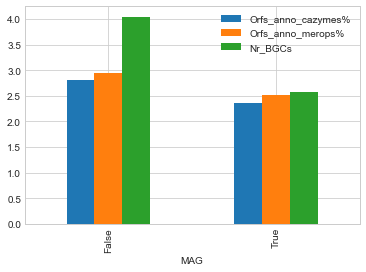

In [57]:
merge.groupby("MAG")["Orfs_anno_cazymes%","Orfs_anno_merops%", "Nr_BGCs"].mean().plot(kind="bar")

# Plots

R^2: 0.41982287568525123
Intercept: [184.57684512]
Slop: [[18.95060426]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


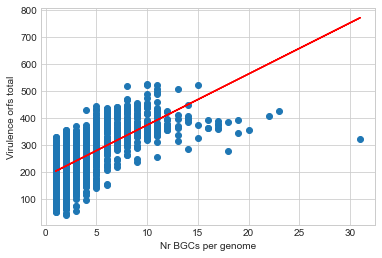

In [18]:
X = merge["Nr_BGCs"].dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge["Virulence orfs total"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.xlabel("Nr BGCs per genome")
plt.ylabel("Virulence orfs total")

plt.show()

R^2: 0.4184233180902046
Intercept: [2722032.902616]
Slop: [[252243.24265145]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}


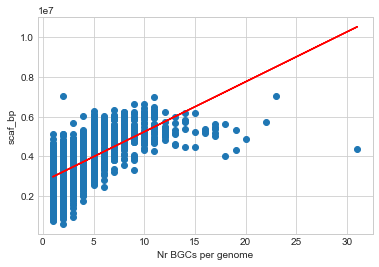

In [14]:
X = merge["Nr_BGCs"].dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge["scaf_bp"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression(normalize=True)  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
p = linear_regressor.get_params
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.xlabel("Nr BGCs per genome")
plt.ylabel("scaf_bp")

plt.show()

R^2: 0.00015552049986711225
Intercept: [0.91565218]
Slop: [[-0.00231238]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}


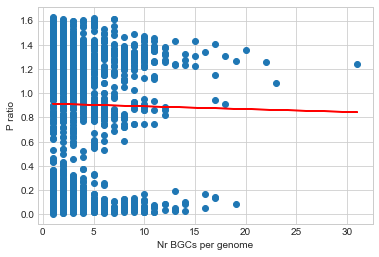

In [12]:
X = merge["Nr_BGCs"].dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge["P"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression(normalize=True)  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
p = linear_regressor.get_params
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.xlabel("Nr BGCs per genome")
plt.ylabel("P ratio")

plt.show()

R^2: 0.050724947331134085
Intercept: [93.8349894]
Slop: [[0.65900214]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}


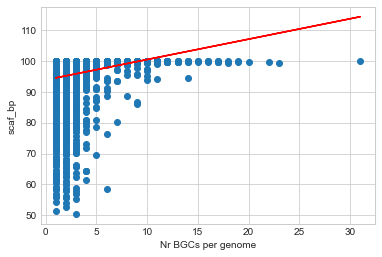

In [58]:
X = merge["Nr_BGCs"].dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge["Completeness"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression(normalize=True)  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
p = linear_regressor.get_params
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.xlabel("Nr BGCs per genome")
plt.ylabel("Completeness")

plt.show()

np.savetxt("foo.csv", X, delimiter=",")
np.savetxt("foo2.csv", Y, delimiter=",")

R^2: 0.0044075965724502675
Intercept: [6.850897e-05]
Slop: [[0.77708653]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}


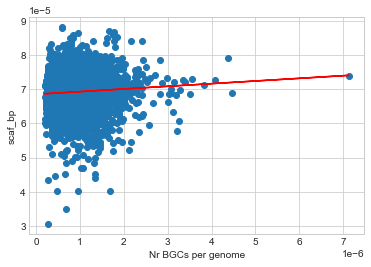

In [26]:
X = (merge["Nr_BGCs"]/merge["scaf_bp"]).dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = (merge["Virulence orfs total"]/merge["scaf_bp"]).values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression(normalize=True)  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
p = linear_regressor.get_params
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.xlabel("Nr BGCs per genome")
plt.ylabel("scaf_bp")

plt.show()

R^2: 0.06063173432049507
Intercept: [3156729.66429253]
Slop: [[5.07508407e+11]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}


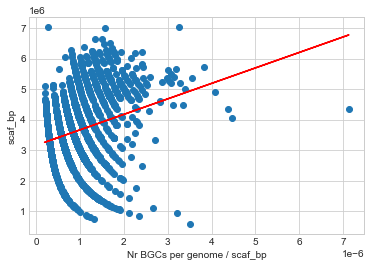

In [59]:
X = (merge["Nr_BGCs"]/merge["scaf_bp"]).dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge["scaf_bp"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression(normalize=True)  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
p = linear_regressor.get_params
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.xlabel("Nr BGCs per genome / scaf_bp")
plt.ylabel("scaf_bp")

plt.show()



R^2: 0.050724947331134085
Intercept: [93.8349894]
Slop: [[0.65900214]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}


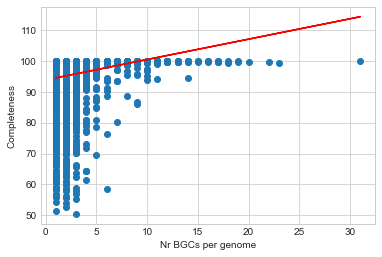

In [17]:
X = merge["Nr_BGCs"].dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge["Completeness"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression(normalize=True)  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
p = linear_regressor.get_params
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.xlabel("Nr BGCs per genome")
plt.ylabel("Completeness")

plt.show()

R^2: 0.09036896233573388
Intercept: [67.19654864]
Slop: [[6.72744103]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


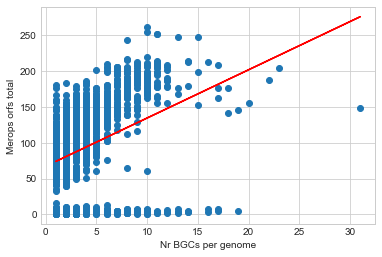

In [19]:
X = merge["Nr_BGCs"].dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge["Merops orfs total"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.xlabel("Nr BGCs per genome")
plt.ylabel("Merops orfs total")

plt.show()

R^2: 0.1266463509148631
Intercept: [66.37992613]
Slop: [[6.60426755]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


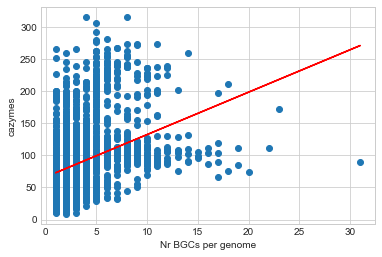

In [20]:
X = merge["Nr_BGCs"].dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge["cazymes"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.xlabel("Nr BGCs per genome")
plt.ylabel("cazymes")

plt.show()

R^2: 0.037243030349691675
Intercept: [75.91822364]
Slop: [[0.16003338]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


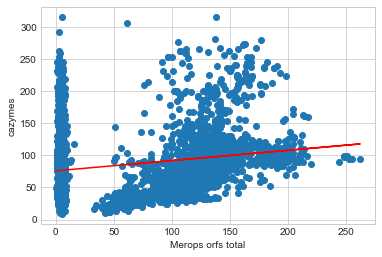

In [21]:
X = merge["Merops orfs total"].dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge["cazymes"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.xlabel("Merops orfs total")
plt.ylabel("cazymes")

plt.show()

R^2: 0.05791943184285564
Intercept: [7.49039038]
Slop: [[0.06855147]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


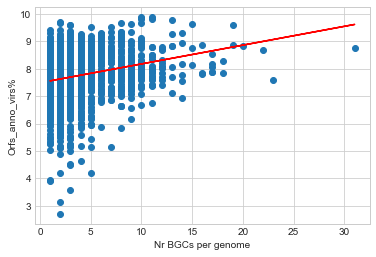

In [22]:
X = merge["Nr_BGCs"].dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge["Orfs_anno_virs%"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.xlabel("Nr BGCs per genome")
plt.ylabel("Orfs_anno_virs%")

plt.show()

R^2: 0.0007969088276382763
Intercept: [7.78138197]
Slop: [[-0.04336534]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


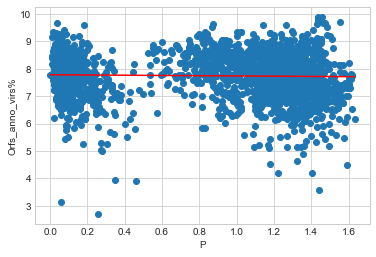

In [23]:
X = merge["P"].dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge["Orfs_anno_virs%"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.xlabel("P")
plt.ylabel("Orfs_anno_virs%")

plt.show()

## By Genus

In [24]:
merge2= merge.copy()
merge2= merge2.groupby("Genus").mean()
merge2.head()

cazymes  Orfs_anno_cazymes%         orfs  Merops orfs total  \
Genus                                                                          
AU392          53.000000            1.744574  3038.000000          92.500000   
Aequorivita    53.309524            1.796647  2958.714286          73.047619   
Algibacter    178.888889            4.441777  4080.777778          94.888889   
Algibacter_A  194.000000            5.806645  3341.000000         107.000000   
Algibacter_B  168.000000            4.933799  3359.200000         100.600000   

              Orfs_anno_merops%       scaf_bp  Completeness   Nr_BGCs  \
Genus                                                                   
AU392                  3.039818  3.336441e+06     99.100000  2.000000   
Aequorivita            2.427991  3.200450e+06     95.061429  2.952381   
Algibacter             2.382086  4.651915e+06     98.622222  1.777778   
Algibacter_A           3.202634  3.994770e+06     98.680000  1.000000   
Algibacter_B           3.011220  4.017717e+06     99.340000  1.200000   

              Virulence orfs total  Orfs_anno_virs%         P  
Genus                                                          
AU392                   294.000000         9.677391  0.794890  
Aequorivita             229.452381         7.745143  0.909100  
Algibacter              317.444444         7.893644  0.641269  
Algibacter_A            284.000000         8.500449  0.710963  
Algibacter_B            292.600000         8.696474  0.767071

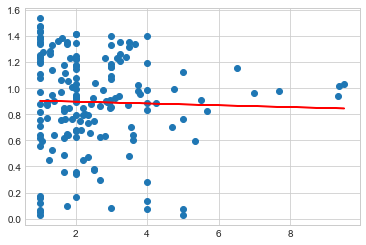

In [25]:
X = merge2["Nr_BGCs"].values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge2["P"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

R^2: 0.2976850304979045
Intercept: [155.9918277]
Slop: [[25.8982655]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


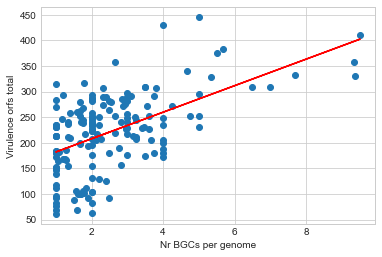

In [28]:
X = merge2["Nr_BGCs"].dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge2["Virulence orfs total"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.xlabel("Nr BGCs per genome")
plt.ylabel("Virulence orfs total")

plt.show()

R^2: 0.3075775654656361
Intercept: [2300047.10300126]
Slop: [[349251.99863498]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}


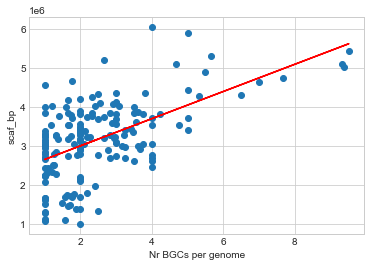

In [29]:
X = merge2["Nr_BGCs"].dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge2["scaf_bp"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression(normalize=True)  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
p = linear_regressor.get_params
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.xlabel("Nr BGCs per genome")
plt.ylabel("scaf_bp")

plt.show()